In [ ]:
#hi habiba
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import os

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = '/content/drive/MyDrive/balanced_500_dataset'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 15977 images belonging to 40 classes.
Found 3991 images belonging to 40 classes.


In [ ]:
class_counts = {}
for class_name in os.listdir("/content/drive/MyDrive/balanced_500_dataset"):
    class_path = os.path.join("/content/drive/MyDrive/balanced_500_dataset", class_name)
    if os.path.isdir(class_path):
      num_images = len(os.listdir(class_path))
      class_counts[class_name] = num_images

In [ ]:
import numpy as np

train_counts = np.bincount(train_generator.classes)

print("Number of training samples per class:")
for label, count in zip(train_generator.class_indices.keys(), train_counts):
    print(f"{label}: {count}")

val_counts = np.bincount(val_generator.classes)

print("Number of validation samples per class:")
for label, count in zip(val_generator.class_indices.keys(), val_counts):
    print(f"{label}: {count}")


Number of training samples per class:
Avocado 1: 400
Beetroot 1: 400
Cabbage white 1: 400
Carrot 1: 400
Cheddar_cheese: 397
Clementine 1: 400
Corn 1: 400
Cucumber 1: 400
Dates 1: 400
Eggplant 1: 400
Green Apple: 400
Orange 1: 400
Pear 1: 400
Red Apple: 398
bechamel: 400
brown roll: 400
chese_cake: 400
diced potato bbq: 398
falafel: 400
fish w viggy: 400
fish_and_chips: 400
foul: 400
fried_fish: 400
green peas: 396
grilled chops: 400
grilled_chicken: 400
grilled_shrimp: 400
kofta: 400
meatball: 400
red sause: 400
rice: 399
salmon: 400
shish tawook: 400
steak: 400
strawberry: 400
tandoori_chicken: 400
white beans: 400
white roll: 400
white sause: 400
white_cheese: 389
Number of validation samples per class:
Avocado 1: 100
Beetroot 1: 100
Cabbage white 1: 100
Carrot 1: 100
Cheddar_cheese: 99
Clementine 1: 100
Corn 1: 100
Cucumber 1: 100
Dates 1: 100
Eggplant 1: 100
Green Apple: 100
Orange 1: 100
Pear 1: 100
Red Apple: 99
bechamel: 100
brown roll: 100
chese_cake: 100
diced potato bbq: 99
f

In [ ]:
print(class_counts)
max_class = max(class_counts, key=class_counts.get)
min_class = min(class_counts, key=class_counts.get)
print(max_class, class_counts[max_class])
print(min_class, class_counts[min_class])
print(sum(class_counts.values())/len(train_generator.class_indices))

{'bechamel': 500, 'brown roll': 500, 'rice': 498, 'white sause': 500, 'white roll': 500, 'red sause': 500, 'Red Apple': 497, 'Green Apple': 500, 'white beans': 500, 'diced potato bbq': 497, 'green peas': 494, 'falafel': 500, 'fish w viggy': 500, 'fish_and_chips': 500, 'fried_fish': 500, 'foul': 500, 'grilled chops': 500, 'grilled_chicken': 500, 'grilled_shrimp': 500, 'kofta': 500, 'meatball': 500, 'salmon': 500, 'shish tawook': 500, 'steak': 500, 'tandoori_chicken': 500, 'Avocado 1': 500, 'Beetroot 1': 500, 'Cabbage white 1': 500, 'Carrot 1': 500, 'Clementine 1': 500, 'Corn 1': 500, 'Cucumber 1': 500, 'Dates 1': 500, 'Orange 1': 500, 'Eggplant 1': 500, 'Pear 1': 500, 'Cheddar_cheese': 500, 'chese_cake': 500, 'white_cheese': 500, 'strawberry': 500}
bechamel 500
green peas 494
499.65


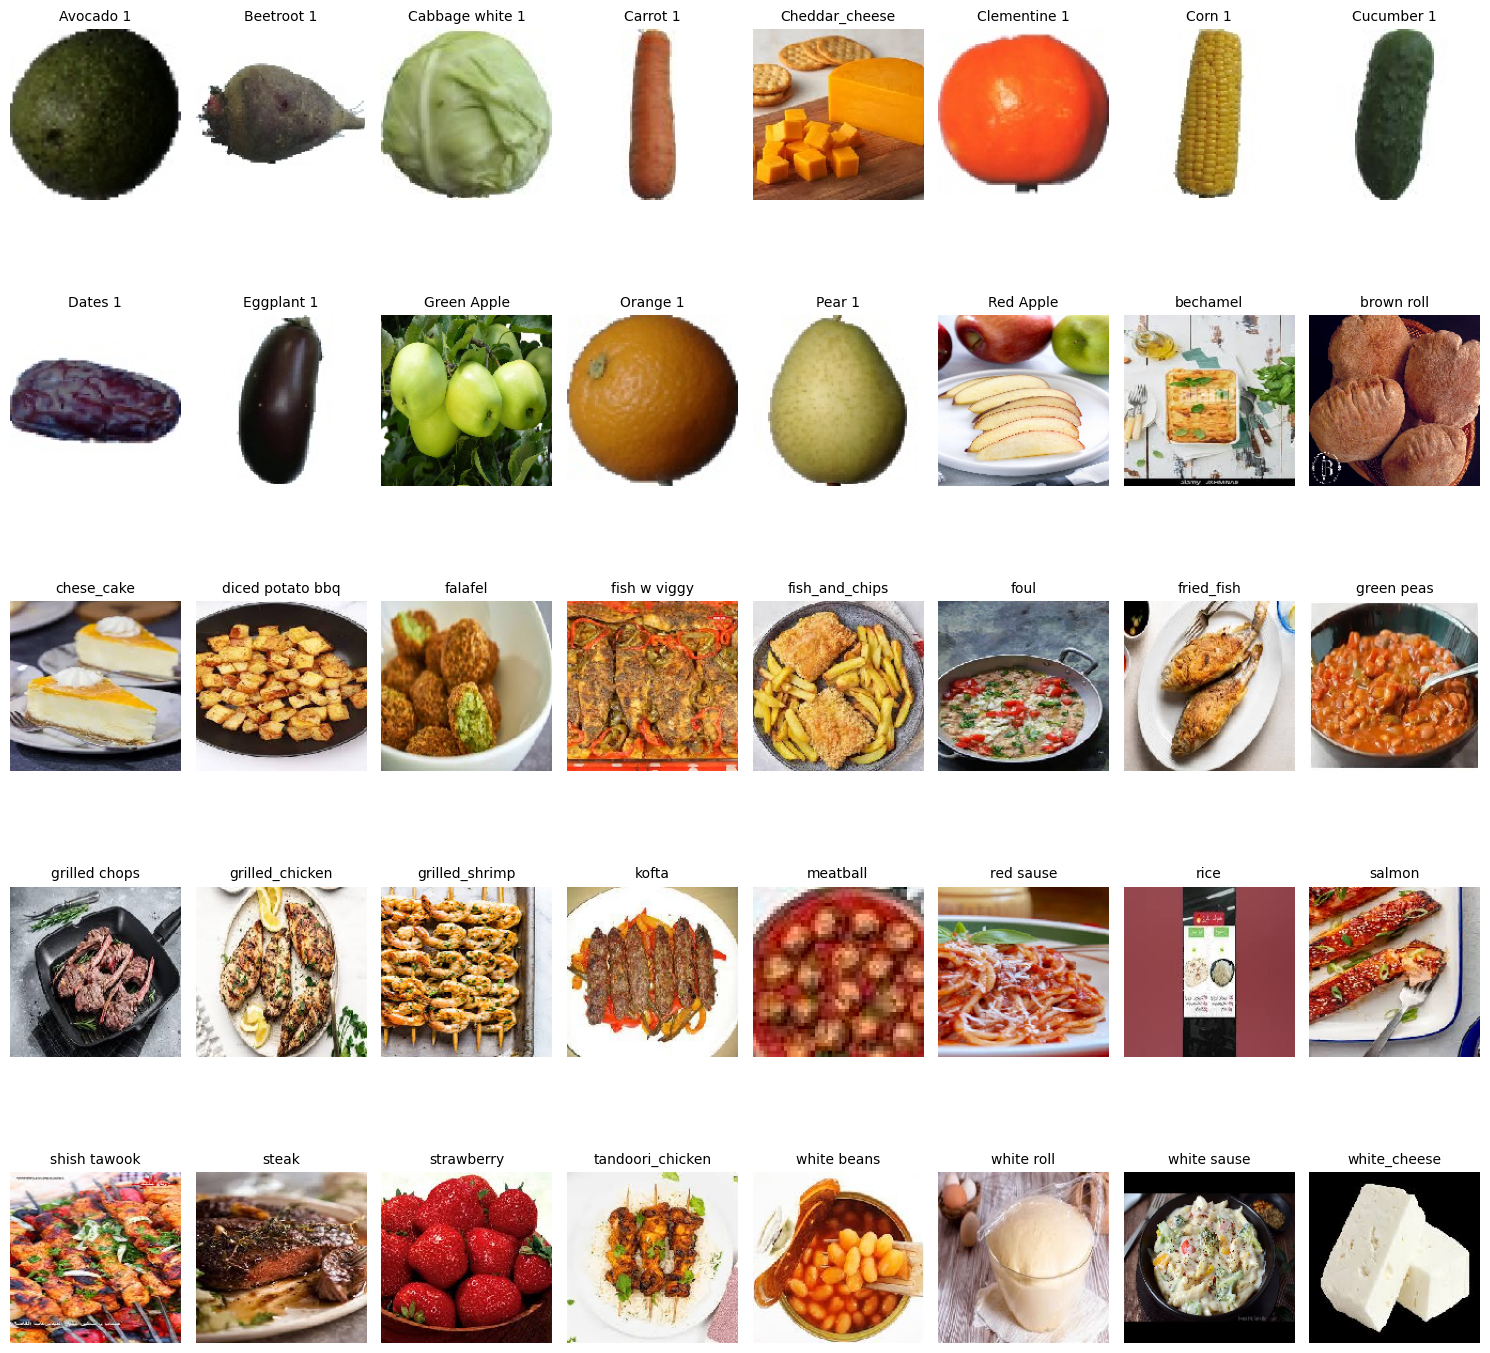

In [ ]:
import random
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

data_dir = train_generator.directory

class_names = list(train_generator.class_indices.keys())

rows = 5
cols = 8
max_images = rows * cols

selected_classes = class_names[:max_images]

img_size = (160, 160)

plt.figure(figsize=(15, 15))

for i, class_name in enumerate(selected_classes):
    class_path = os.path.join(data_dir, class_name)
    image_files = os.listdir(class_path)

    if not image_files:
        continue

    random_image_name = random.choice(image_files)
    random_image_path = os.path.join(class_path, random_image_name)

    img = image.load_img(random_image_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0

    plt.subplot(rows, cols, i + 1)
    plt.imshow(img_array)
    plt.title(class_name, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(160, 160, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(40, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
checkpoint = ModelCheckpoint('/content/drive/MyDrive/best_modelPRE.h5', save_best_only=True, monitor='val_accuracy')

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
370/500 ━━━━━━━━━━━━━━━━━━━━ 44:36 21s/step - accuracy: 0.4316 - loss: 2.1710

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.4770 - loss: 1.9674 

500/500 ━━━━━━━━━━━━━━━━━━━━ 12616s 25s/step - accuracy: 0.4773 - loss: 1.9661 - val_accuracy: 0.7935 - val_loss: 0.6509
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.7558 - loss: 0.7849

500/500 ━━━━━━━━━━━━━━━━━━━━ 314s 627ms/step - accuracy: 0.7558 - loss: 0.7848 - val_accuracy: 0.8344 - val_loss: 0.5158
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.7993 - loss: 0.6396

500/500 ━━━━━━━━━━━━━━━━━━━━ 319s 638ms/step - accuracy: 0.7992 - loss: 0.6396 - val_accuracy: 0.8717 - val_loss: 0.4281
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.8171 - loss: 0.5705

500/500 ━━━━━━━━━━━━━━━━━━━━ 331s 662ms/step - accuracy: 0.8171 - loss: 0.5705 - val_accuracy: 0.8730 - val_loss: 0.4195
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 386s 671ms/step - accuracy: 0.8231 - loss: 0.5442 - val_accuracy: 0.8687 - val_loss: 0.3937
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.8319 - loss: 0.5124

500/500 ━━━━━━━━━━━━━━━━━━━━ 375s 658ms/step - accuracy: 0.8319 - loss: 0.5124 - val_accuracy: 0.8852 - val_loss: 0.3571
Epoch 7/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.8410 - loss: 0.4839

500/500 ━━━━━━━━━━━━━━━━━━━━ 393s 679ms/step - accuracy: 0.8410 - loss: 0.4839 - val_accuracy: 0.8860 - val_loss: 0.3422
Epoch 8/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.8567 - loss: 0.4555

500/500 ━━━━━━━━━━━━━━━━━━━━ 331s 661ms/step - accuracy: 0.8567 - loss: 0.4555 - val_accuracy: 0.8980 - val_loss: 0.3216
Epoch 9/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.8546 - loss: 0.4463

500/500 ━━━━━━━━━━━━━━━━━━━━ 328s 656ms/step - accuracy: 0.8546 - loss: 0.4463 - val_accuracy: 0.9030 - val_loss: 0.3000
Epoch 10/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.8622 - loss: 0.4268

500/500 ━━━━━━━━━━━━━━━━━━━━ 325s 650ms/step - accuracy: 0.8622 - loss: 0.4268 - val_accuracy: 0.9203 - val_loss: 0.2670
Epoch 11/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 333s 665ms/step - accuracy: 0.8698 - loss: 0.3926 - val_accuracy: 0.9166 - val_loss: 0.2686
Epoch 12/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 328s 655ms/step - accuracy: 0.8647 - loss: 0.4042 - val_accuracy: 0.9161 - val_loss: 0.2611
Epoch 13/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - accuracy: 0.8741 - loss: 0.3828

500/500 ━━━━━━━━━━━━━━━━━━━━ 336s 672ms/step - accuracy: 0.8741 - loss: 0.3828 - val_accuracy: 0.9206 - val_loss: 0.2629
Epoch 14/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 332s 664ms/step - accuracy: 0.8724 - loss: 0.3751 - val_accuracy: 0.9158 - val_loss: 0.2651
Epoch 15/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 345s 690ms/step - accuracy: 0.8747 - loss: 0.3685 - val_accuracy: 0.9206 - val_loss: 0.2573
Epoch 16/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.8813 - loss: 0.3490

500/500 ━━━━━━━━━━━━━━━━━━━━ 350s 701ms/step - accuracy: 0.8813 - loss: 0.3490 - val_accuracy: 0.9276 - val_loss: 0.2310
Epoch 17/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 332s 663ms/step - accuracy: 0.8848 - loss: 0.3420 - val_accuracy: 0.9271 - val_loss: 0.2308
Epoch 18/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.8894 - loss: 0.3302

500/500 ━━━━━━━━━━━━━━━━━━━━ 386s 670ms/step - accuracy: 0.8894 - loss: 0.3303 - val_accuracy: 0.9371 - val_loss: 0.2106
Epoch 19/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 341s 683ms/step - accuracy: 0.8924 - loss: 0.3305 - val_accuracy: 0.9326 - val_loss: 0.2337
Epoch 20/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 335s 670ms/step - accuracy: 0.8930 - loss: 0.3216 - val_accuracy: 0.9344 - val_loss: 0.2116
Epoch 21/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.8943 - loss: 0.3266

500/500 ━━━━━━━━━━━━━━━━━━━━ 332s 663ms/step - accuracy: 0.8943 - loss: 0.3266 - val_accuracy: 0.9401 - val_loss: 0.1917
Epoch 22/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 333s 666ms/step - accuracy: 0.8972 - loss: 0.3102 - val_accuracy: 0.9366 - val_loss: 0.1948
Epoch 23/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.8950 - loss: 0.3113

500/500 ━━━━━━━━━━━━━━━━━━━━ 377s 656ms/step - accuracy: 0.8950 - loss: 0.3113 - val_accuracy: 0.9421 - val_loss: 0.1936
Epoch 24/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 331s 661ms/step - accuracy: 0.8997 - loss: 0.2992 - val_accuracy: 0.9376 - val_loss: 0.1979
Epoch 25/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 533ms/step - accuracy: 0.9023 - loss: 0.2972

500/500 ━━━━━━━━━━━━━━━━━━━━ 334s 668ms/step - accuracy: 0.9023 - loss: 0.2972 - val_accuracy: 0.9451 - val_loss: 0.1833
Epoch 26/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 345s 689ms/step - accuracy: 0.9056 - loss: 0.2935 - val_accuracy: 0.9411 - val_loss: 0.1982
Epoch 27/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.9017 - loss: 0.2893

500/500 ━━━━━━━━━━━━━━━━━━━━ 334s 668ms/step - accuracy: 0.9017 - loss: 0.2893 - val_accuracy: 0.9481 - val_loss: 0.1767
Epoch 28/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 328s 657ms/step - accuracy: 0.9065 - loss: 0.2853 - val_accuracy: 0.9411 - val_loss: 0.1803
Epoch 29/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 331s 661ms/step - accuracy: 0.9030 - loss: 0.2875 - val_accuracy: 0.9464 - val_loss: 0.1861
Epoch 30/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 323s 647ms/step - accuracy: 0.9085 - loss: 0.2796 - val_accuracy: 0.9449 - val_loss: 0.1896


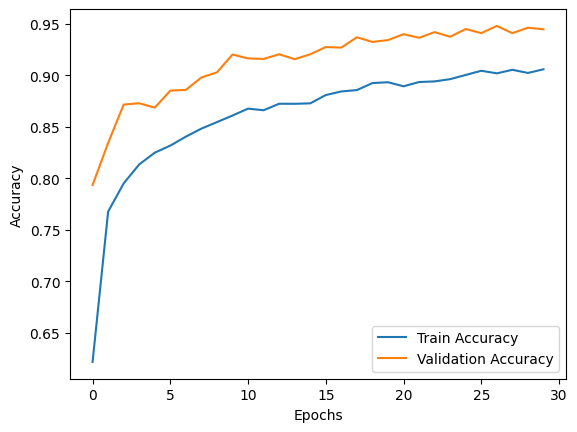

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image


img_path = '/content/drive/MyDrive/our dataset/red sause/02005ad4-9015-4771-b6ff-415112ef7c6b.jpeg'
img = image.load_img(img_path, target_size=(160, 160))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)



prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

class_indices = train_generator.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}


predicted_label = idx_to_class[predicted_class]
print(f'Predicted Meal: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Meal: red sause


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image


img_path = '/content/drive/MyDrive/our dataset/bechamel/086c3c8f-292c-447e-bd14-1e36735efc22.jpeg'
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)


prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)


class_indices = train_generator.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}


predicted_label = idx_to_class[predicted_class]
print(f'Predicted Meal: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 996ms/step
Predicted Meal: bechamel


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image


img_path = '/content/drive/MyDrive/our dataset/salmon/images (14).jpg'
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)


prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)


class_indices = train_generator.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}


predicted_label = idx_to_class[predicted_class]
print(f'Predicted Meal: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Meal: fish_and_chips


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(160, 160, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(36, activation='softmax')(x)

model3k = Model(inputs=base_model.input, outputs=output)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 80, 80,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 80, 80,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 80, 80,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 80, 80,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 80, 80,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 80, 80,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 81, 81,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 40, 40,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 40, 40,    │      2,304 │ block_1_depthwis

 Total params: 2,426,596 (9.26 MB)

 Trainable params: 168,612 (658.64 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model3k.compile(
    loss=CategoricalCrossentropy(),
    optimizer=Adam(learning_rate=0.01),
    metrics=[
        'accuracy',
        TopKCategoricalAccuracy(k=3, name='top_3_accuracy')
    ]
)

In [ ]:
checkpoint3k = ModelCheckpoint('/content/drive/MyDrive/best_model3k.h5', save_best_only=True, monitor='val_top_3_accuracy')

history = model3k.fit(
    train_generator,
    epochs=40,
    validation_data=val_generator,
    callbacks=[checkpoint3k]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
114/450 ━━━━━━━━━━━━━━━━━━━━ 50:32 9s/step - accuracy: 0.3948 - loss: 2.3936 - top_3_accuracy: 0.5574

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5285 - loss: 1.7068 - top_3_accuracy: 0.7090

450/450 ━━━━━━━━━━━━━━━━━━━━ 4988s 11s/step - accuracy: 0.5286 - loss: 1.7060 - top_3_accuracy: 0.7092 - val_accuracy: 0.7065 - val_loss: 0.9651 - val_top_3_accuracy: 0.8793
Epoch 2/40
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 969ms/step - accuracy: 0.6706 - loss: 1.1062 - top_3_accuracy: 0.8489

450/450 ━━━━━━━━━━━━━━━━━━━━ 579s 1s/step - accuracy: 0.6706 - loss: 1.1062 - top_3_accuracy: 0.8490 - val_accuracy: 0.7599 - val_loss: 0.7722 - val_top_3_accuracy: 0.9068
Epoch 3/40
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 975ms/step - accuracy: 0.6953 - loss: 1.0400 - top_3_accuracy: 0.8699

450/450 ━━━━━━━━━━━━━━━━━━━━ 588s 1s/step - accuracy: 0.6953 - loss: 1.0400 - top_3_accuracy: 0.8699 - val_accuracy: 0.7686 - val_loss: 0.7644 - val_top_3_accuracy: 0.9085
Epoch 4/40
450/450 ━━━━━━━━━━━━━━━━━━━━ 542s 1s/step - accuracy: 0.7073 - loss: 1.0155 - top_3_accuracy: 0.8678 - val_accuracy: 0.7697 - val_loss: 0.7504 - val_top_3_accuracy: 0.9049
Epoch 5/40
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 965ms/step - accuracy: 0.7211 - loss: 0.9749 - top_3_accuracy: 0.8814

450/450 ━━━━━━━━━━━━━━━━━━━━ 564s 1s/step - accuracy: 0.7211 - loss: 0.9750 - top_3_accuracy: 0.8814 - val_accuracy: 0.7739 - val_loss: 0.7178 - val_top_3_accuracy: 0.9138
Epoch 6/40
450/450 ━━━━━━━━━━━━━━━━━━━━ 576s 1s/step - accuracy: 0.7308 - loss: 0.9358 - top_3_accuracy: 0.8840 - val_accuracy: 0.7597 - val_loss: 0.7520 - val_top_3_accuracy: 0.9104
Epoch 7/40
450/450 ━━━━━━━━━━━━━━━━━━━━ 545s 1s/step - accuracy: 0.7300 - loss: 0.9543 - top_3_accuracy: 0.8753 - val_accuracy: 0.7455 - val_loss: 0.7876 - val_top_3_accuracy: 0.8976
Epoch 8/40
450/450 ━━━━━━━━━━━━━━━━━━━━ 575s 1s/step - accuracy: 0.7376 - loss: 0.9262 - top_3_accuracy: 0.8797 - val_accuracy: 0.7911 - val_loss: 0.6979 - val_top_3_accuracy: 0.9018
Epoch 9/40
450/450 ━━━━━━━━━━━━━━━━━━━━ 535s 1s/step - accuracy: 0.7343 - loss: 0.9584 - top_3_accuracy: 0.8824 - val_accuracy: 0.7872 - val_loss: 0.7330 - val_top_3_accuracy: 0.8979
Epoch 10/40
450/450 ━━━━━━━━━━━━━━━━━━━━ 542s 1s/step - accuracy: 0.7494 - loss: 0.8958 - top_3_

450/450 ━━━━━━━━━━━━━━━━━━━━ 571s 1s/step - accuracy: 0.7530 - loss: 0.9032 - top_3_accuracy: 0.8838 - val_accuracy: 0.7872 - val_loss: 0.6918 - val_top_3_accuracy: 0.9146
Epoch 12/40
450/450 ━━━━━━━━━━━━━━━━━━━━ 549s 1s/step - accuracy: 0.7505 - loss: 0.9163 - top_3_accuracy: 0.8820 - val_accuracy: 0.7981 - val_loss: 0.7008 - val_top_3_accuracy: 0.9093
Epoch 13/40
450/450 ━━━━━━━━━━━━━━━━━━━━ 537s 1s/step - accuracy: 0.7587 - loss: 0.9357 - top_3_accuracy: 0.8828 - val_accuracy: 0.7808 - val_loss: 0.7452 - val_top_3_accuracy: 0.8907
Epoch 14/40
450/450 ━━━━━━━━━━━━━━━━━━━━ 548s 1s/step - accuracy: 0.7601 - loss: 0.8865 - top_3_accuracy: 0.8852 - val_accuracy: 0.7975 - val_loss: 0.6761 - val_top_3_accuracy: 0.9118
Epoch 15/40
450/450 ━━━━━━━━━━━━━━━━━━━━ 560s 1s/step - accuracy: 0.7645 - loss: 0.8925 - top_3_accuracy: 0.8851 - val_accuracy: 0.7953 - val_loss: 0.7099 - val_top_3_accuracy: 0.8946
Epoch 16/40
450/450 ━━━━━━━━━━━━━━━━━━━━ 541s 1s/step - accuracy: 0.7564 - loss: 0.9100 - to